In [174]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

pd.set_option('display.max_columns', None)

In [184]:
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize': '12',
          'figure.figsize': (10, 7),
          'axes.labelsize': '12',
          'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12',
          'patch.linewidth': 0.0
         }

plt.rcParams.update(params)

In [93]:

from functions.pipeline import *
from functions.test import *

In [94]:
# Definimos variables categóricas y numéricas
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']



In [221]:
data = pd.read_csv("../datasets/dataset.csv", sep=',', decimal='.')
data = data.drop_duplicates()
data = data.drop('split', axis=1)

In [222]:
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target = ['label']

In [223]:
data[categorical_vars + target] = data[categorical_vars + target].astype(float).astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 865
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       865 non-null    float64
 1   sex       865 non-null    Int64  
 2   cp        865 non-null    Int64  
 3   trestbps  808 non-null    float64
 4   chol      839 non-null    float64
 5   fbs       783 non-null    Int64  
 6   restecg   864 non-null    Int64  
 7   thalach   810 non-null    float64
 8   exang     810 non-null    Int64  
 9   oldpeak   805 non-null    float64
 10  slope     570 non-null    Int64  
 11  ca        297 non-null    Int64  
 12  thal      413 non-null    Int64  
 13  label     865 non-null    Int64  
dtypes: Int64(9), float64(5)
memory usage: 109.0 KB


In [224]:
df =  pd.DataFrame(data[numerical_vars + categorical_vars + target].isna().sum().to_dict(), index=[f"Missing values - total"])

for val in [0, 1, 2, 3, 4]:
    tmp = pd.DataFrame(data[data[numerical_vars + categorical_vars + target]['label'] == (val)].isna().sum().to_dict(), index=[f"Missing values - label = {val}"])
    df = pd.concat([df, tmp], axis=0)

df

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,label
Missing values - total,0,57,26,55,60,0,0,82,1,55,295,568,452,0
Missing values - label = 0,0,20,17,20,21,0,0,14,0,20,189,238,217,0
Missing values - label = 1,0,13,1,13,14,0,0,36,1,13,47,128,88,0
Missing values - label = 2,0,8,5,7,8,0,0,19,0,7,28,91,64,0
Missing values - label = 3,0,14,3,13,15,0,0,12,0,13,27,90,66,0
Missing values - label = 4,0,2,0,2,2,0,0,1,0,2,4,21,17,0


In [225]:
data['chol'] = data['chol'].replace(0, np.nan)
data['na_count'] = data.isnull().sum(axis=1)
data['na_count'].value_counts()

0    286
3    218
2    196
4     81
7     43
1     25
8     11
5      4
6      1
Name: na_count, dtype: int64

In [226]:
data['num_na_count'] = data[numerical_vars].isnull().sum(axis=1)
data['cat_na_count'] = data[categorical_vars].isnull().sum(axis=1)
data['na_count'] = data['num_na_count'] + data['cat_na_count']
data['na_count'].value_counts()

0    286
3    218
2    196
4     81
7     43
1     25
8     11
5      4
6      1
Name: na_count, dtype: int64

<Figure size 900x600 with 0 Axes>

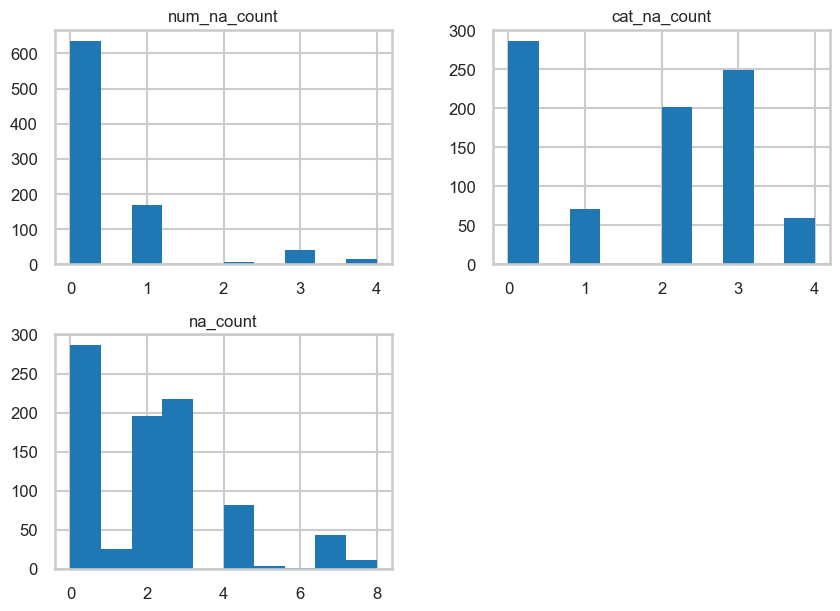

In [227]:

plt.figure(figsize=(9,6))

data[['num_na_count', 'cat_na_count', 'na_count']].hist(bins=10)
plt.show()

In [228]:
# Además de valores no informados, tenemos 0s en algunas variables numéricas
df = pd.DataFrame(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].eq(0).sum().to_dict(), index=[f"Zero values - total"])

for val in [0, 1, 2, 3, 4]:
    tmp = pd.DataFrame(data[data['label'] == str(val)][['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].eq(0).sum().to_dict(), index=[f"Zero values - label = {val}"])
    df = pd.concat([df, tmp], axis=0)

df

,age,trestbps,chol,thalach,oldpeak
Zero values - total,0.0,1.0,0.0,0.0,354.0
Zero values - label = 0,0.0,0.0,0.0,0.0,0.0
Zero values - label = 1,0.0,0.0,0.0,0.0,0.0
Zero values - label = 2,0.0,0.0,0.0,0.0,0.0
Zero values - label = 3,0.0,0.0,0.0,0.0,0.0
Zero values - label = 4,0.0,0.0,0.0,0.0,0.0


In [229]:
data[numerical_vars].describe()

,age,trestbps,chol,thalach,oldpeak
count,865.000000,808.000000,680.000000,810.000000,805.000000
mean,53.431214,132.070545,246.025000,137.717284,0.847702
std,9.475490,19.130575,58.057061,26.163654,1.071527
min,28.000000,0.000000,85.000000,60.000000,-2.600000
25%,47.000000,120.000000,209.000000,120.000000,0.000000
50%,54.000000,130.000000,239.000000,140.000000,0.500000
75%,60.000000,140.000000,275.250000,158.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [230]:
data['age2'] = data['age'] // 10 
data['age2'].value_counts()

5.0    352
6.0    205
4.0    202
3.0     72
7.0     30
2.0      4
Name: age2, dtype: int64

In [231]:
data.groupby(['label'])['age2'].agg([len, pd.Series.mode]).reset_index()

,label,len,mode
0,0,399,5.0
1,1,185,5.0
2,2,123,5.0
3,3,125,5.0
4,4,33,5.0


In [232]:
data['age2'].astype(str).describe()

count     865
unique      6
top       5.0
freq      352
Name: age2, dtype: object

**Presión arterial**

In [233]:
data[data['trestbps'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,na_count,num_na_count,cat_na_count,age2
189,55.0,1,3,0.0,NaN,0,0,155.0,0,1.5,2,<NA>,<NA>,3,3,1,2,5.0


In [239]:
# la presión por encima de 170, aunque sea un outlier, es una patología que nos indica mayor riesgo de enfermedad
data[data['trestbps'] >= 170]['label'].value_counts()

0    12
1     9
3     9
2     5
4     3
Name: label, dtype: Int64

In [219]:
# entre 140 y 190 también tenemos patología de hipertensión,  más del 50% de pacientes con tensión alta están enfermos
data[(data['trestbps'] >= 120) & (data['trestbps'] < 180)]['label'].value_counts()

0    300
1    119
3     96
2     95
4     26
Name: label, dtype: Int64

In [126]:
# por debajo de 120 predominan los pacientes sanos
data[(data['trestbps'] <= 120)]['label'].value_counts()

0    147
1     69
2     32
3     23
4      8
Name: label, dtype: Int64

In [127]:
data[(data['trestbps'] >= 170) & (data['label'] == 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,na_count,num_na_count,cat_na_count,age2
1,52.0,1,3,172.0,199.0,1,0,162.0,0,0.5,1,0,7,0,0,0,0,5.0
132,39.0,1,2,190.0,241.0,0,0,106.0,0,0.0,<NA>,<NA>,<NA>,0,3,0,3,3.0
149,64.0,1,1,170.0,227.0,0,2,155.0,0,0.6,2,0,7,0,0,0,0,6.0
219,59.0,1,1,178.0,270.0,0,2,145.0,0,4.2,3,0,7,0,0,0,0,5.0
257,57.0,0,4,180.0,347.0,0,1,126.0,1,0.8,2,<NA>,<NA>,0,2,0,2,5.0
265,64.0,0,4,180.0,325.0,0,0,154.0,1,0.0,1,0,3,0,0,0,0,6.0
314,46.0,1,4,180.0,280.0,0,1,120.0,0,0.0,<NA>,<NA>,<NA>,0,3,0,3,4.0
358,50.0,1,2,170.0,209.0,0,1,116.0,0,0.0,<NA>,<NA>,<NA>,0,3,0,3,5.0
438,30.0,0,1,170.0,237.0,0,1,170.0,0,0.0,<NA>,<NA>,6,0,2,0,2,3.0
550,60.0,1,3,180.0,NaN,0,1,140.0,1,1.5,2,<NA>,<NA>,0,3,1,2,6.0


In [128]:
data.groupby(['age2'])['trestbps'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,120.0,130.000000,140.0
1,3.0,72,92.0,124.521127,190.0
2,4.0,202,95.0,126.974747,180.0
3,5.0,352,0.0,133.422961,200.0
4,6.0,205,95.0,136.825843,200.0
5,7.0,30,110.0,142.038462,170.0


In [129]:
data[data['label'] == 0].groupby(['age2'])['trestbps'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,120.0,130.000000,140.0
1,3.0,49,98.0,127.812500,190.0
2,4.0,123,100.0,126.733333,180.0
3,5.0,158,80.0,130.927632,180.0
4,6.0,56,102.0,136.021277,180.0
5,7.0,9,110.0,139.750000,160.0


In [130]:
# Por debajo de los 50 años, los enfermos tienen en media una tensión menor que los sanos en el mismo rango de edad,
# pero a partir de los 50, los pacientes enfermos tienen una tensión mayor que los sanos
data[data['label'] != 0].groupby(['age2'])['trestbps'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,3.0,23,92.0,117.652174,150.0
1,4.0,79,95.0,127.346154,160.0
2,5.0,194,0.0,135.541899,200.0
3,6.0,149,95.0,137.114504,200.0
4,7.0,21,115.0,143.055556,170.0


In [131]:
data.loc[data['trestbps'] > 180, 'trestbps2'] = 2
data.loc[(data['trestbps'] > 120) & (data['trestbps'] <= 180), 'trestbps2'] = 1
data.loc[data['trestbps'] <= 120, 'trestbps2'] = 0

data['trestbps2'].value_counts()

1.0    522
0.0    279
2.0      7
Name: trestbps2, dtype: int64

In [132]:
data[data['trestbps'] == 0]['trestbps']

189    0.0
Name: trestbps, dtype: float64

**Colesteriol**

In [240]:
data[(data['chol'] == 0) & (data['label'] == 0)].shape

(0, 18)

In [241]:
data[(data['chol'] == 0) & (data['label'] != 0)].shape

(0, 18)

In [135]:
data[(data['chol'] == 0) & (data['label'] != 0)].head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,na_count,num_na_count,cat_na_count,age2,trestbps2


In [136]:
data['chol'] = data['chol'].replace(0, np.nan)

In [137]:
data.groupby(['age2'])['chol'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,132.0,193.000000,243.0
1,3.0,72,117.0,235.606557,529.0
2,4.0,202,141.0,241.062857,466.0
3,5.0,352,85.0,248.593525,603.0
4,6.0,205,139.0,254.042857,564.0
5,7.0,30,149.0,238.478261,322.0


In [138]:
# En el rango de 50 a 60 tenemos un outlier, en ese rango de edad es muy raro tener colesterol tan bajo

data[data['chol'] < 100]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,na_count,num_na_count,cat_na_count,age2,trestbps2
751,56.0,1,4,120.0,85.0,0,0,140.0,0,0.0,<NA>,<NA>,<NA>,0,3,0,3,5.0,0.0


In [139]:
# Muchos paacientes sanos también presentan niveles de colesterol altos
data[data['chol'] >= 300]['label'].value_counts()

0    48
2    16
1    15
3    14
4     5
Name: label, dtype: Int64

In [140]:
# Pero para niveles de colesterol más altos de 300 no tenemos más enfermos, el riesgo no aumenta
# aquí si que tendría sentido clippear
data[data['chol'] >= 400]['label'].value_counts()

0    5
2    3
3    2
1    1
Name: label, dtype: Int64

In [141]:
# Por encima de 200 tenemos casi 50 / 50 de enfermos y gente sana
data[(data['chol'] >= 200)]['label'].value_counts()

0    284
1    109
3     73
2     65
4     26
Name: label, dtype: Int64

In [142]:
# A niveles por debajo de 200, tenemos menos enfermos que no enfermos
data[data['chol'] < 200]['label'].value_counts()

0    78
1    18
3    13
2    11
4     3
Name: label, dtype: Int64

<Axes: xlabel='age', ylabel='chol'>

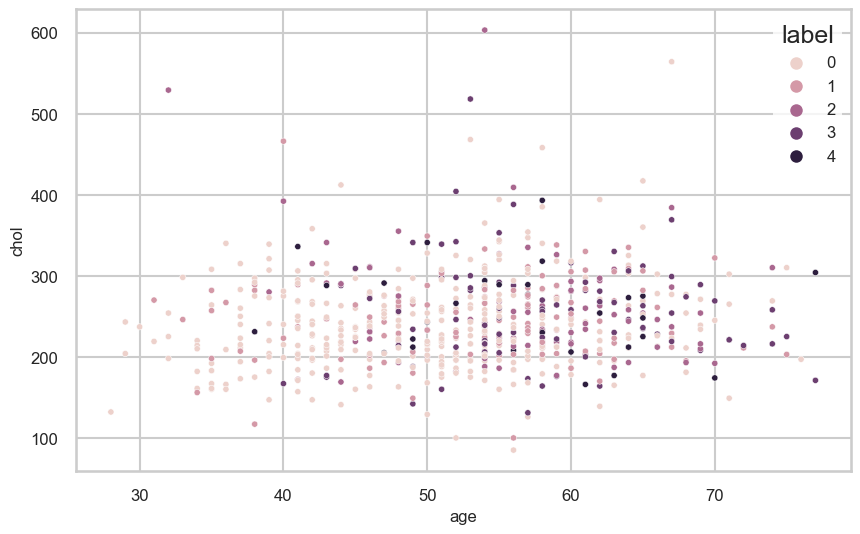

In [143]:
data['label'] = data['label'].astype(int)
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='age', y='chol', hue='label', s=20)

In [144]:
data[data['label'] == 0].groupby(['age2'])['chol'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,132.0,193.000000,243.0
1,3.0,49,147.0,229.673913,340.0
2,4.0,123,141.0,236.776786,412.0
3,5.0,158,85.0,241.585034,468.0
4,6.0,56,139.0,257.446809,564.0
5,7.0,9,149.0,248.142857,310.0


In [145]:
# Pacientes enfermos por debajo de los 50 años tienen en media nivel más alto de colesterol que los pacientes sanos, 
# la diferencia es mayor en los más jóvenes
data[data['label'] != 0].groupby(['age2'])['chol'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,3.0,23,117.0,253.800000,529.0
1,4.0,79,142.0,248.682540,466.0
2,5.0,194,100.0,256.458015,603.0
3,6.0,149,164.0,252.322581,384.0
4,7.0,21,171.0,234.250000,322.0


In [146]:
data['chol'].isnull().groupby([data['age2']]).sum().astype(int)

age2
2.0     1
3.0    11
4.0    27
5.0    74
6.0    65
7.0     7
Name: chol, dtype: int64

In [147]:
data['chol'].isnull().groupby([data['label']]).sum().astype(int)

label
0    37
1    58
2    47
3    39
4     4
Name: chol, dtype: int64

**Oldpeak**

In [148]:
data['oldpeak_abs'] = np.abs(data['oldpeak'])

In [149]:
data[data['oldpeak'] >= 0]['oldpeak'].describe()

count    793.000000
mean       0.876545
std        1.050279
min        0.000000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [150]:
data.groupby(['age2'])['oldpeak_abs'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,0.0,0.000000,0.0
1,3.0,72,0.0,0.472857,3.8
2,4.0,202,0.0,0.619095,3.6
3,5.0,352,0.0,0.910334,5.6
4,6.0,205,0.0,1.231073,6.2
5,7.0,30,0.0,1.311538,4.0


In [151]:
# Para los no enfermos, en media el valor está por debajo de 1, aunque hay algunos outliers
# El valor tiende a incrementar con la edad
data[data['label'] == 0].groupby(['age2'])['oldpeak_abs'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,0.0,0.000000,0.0
1,3.0,49,0.0,0.243750,3.5
2,4.0,123,0.0,0.268595,3.0
3,5.0,158,0.0,0.482000,4.2
4,6.0,56,0.0,0.774468,3.0
5,7.0,9,0.0,0.862500,2.0


In [152]:
# Los enfermos tienen un valor de oldpeak mayor en media que los no enfermos, y el valor va creciendo con la edad
# como con los pacientes no enfermos
data[data['label'] != 0].groupby(['age2'])['oldpeak_abs'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,3.0,23,0.0,0.972727,3.8
1,4.0,79,0.0,1.162821,3.6
2,5.0,194,0.0,1.269274,5.6
3,6.0,149,0.0,1.396154,6.2
4,7.0,21,0.0,1.511111,4.0


In [153]:
# valores mayores que 2.5 indican enfermedad con gran probabilidad
data[data['oldpeak_abs'] >= 2]['label'].value_counts()

3    48
2    44
1    25
0    21
4    21
Name: label, dtype: int64

In [154]:
# entre 1 y 2.5 hay bastante riesgo, tenemos el doble de enfermos que de no enfermos
data[(data['oldpeak_abs'] >= 0.75) & (data['oldpeak_abs'] < 2.5)]['label'].value_counts()

0    90
1    81
3    62
2    56
4    12
Name: label, dtype: int64

In [155]:
data[(data['oldpeak'] >= 0.75) & (data['slope'].isin([2, 3]))]['label'].value_counts()

3    72
1    70
2    63
0    57
4    25
Name: label, dtype: int64

In [156]:
# Por debajo de 0.75, ya tenemos menos enfermos
data[(data['oldpeak_abs'] < 0.75)]['label'].value_counts()

0    282
1     79
2     38
3     25
4      5
Name: label, dtype: int64

In [157]:
# Pero tenemos bastantes enfermos con oldpeak 0, podrían ser outliers
data[(data['oldpeak_abs'] == 0)]['label'].value_counts()

0    238
1     60
2     33
3     19
4      4
Name: label, dtype: int64

In [158]:
data[(data['oldpeak_abs'] == 0) & (data['label'] != 0)].groupby(['age2'])['age2'].count()

age2
3.0    10
4.0    24
5.0    48
6.0    28
7.0     6
Name: age2, dtype: int64

In [159]:

tmp = data[data['label'] == 0].groupby(['age2'])['oldpeak_abs'].agg([np.mean])
tmp['mean'] = tmp['mean'].round(decimals=1)

In [160]:
# Creamos una nueva columna para cuantificar cuanto se desvía el valor de oldpeak de la media para casos no enfermos, por rango de edad

data = pd.merge(data, tmp[['mean']], on="age2", how="left")
data['oldpeak_diff'] = data['oldpeak_abs'] - data['mean']
data['oldpeak_diff'].describe()

count    805.000000
mean       0.378385
std        1.014180
min       -0.900000
25%       -0.300000
50%        0.000000
75%        1.000000
max        5.400000
Name: oldpeak_diff, dtype: float64

In [161]:
data = data.drop('mean', axis=1)


<Axes: xlabel='label', ylabel='oldpeak_diff'>

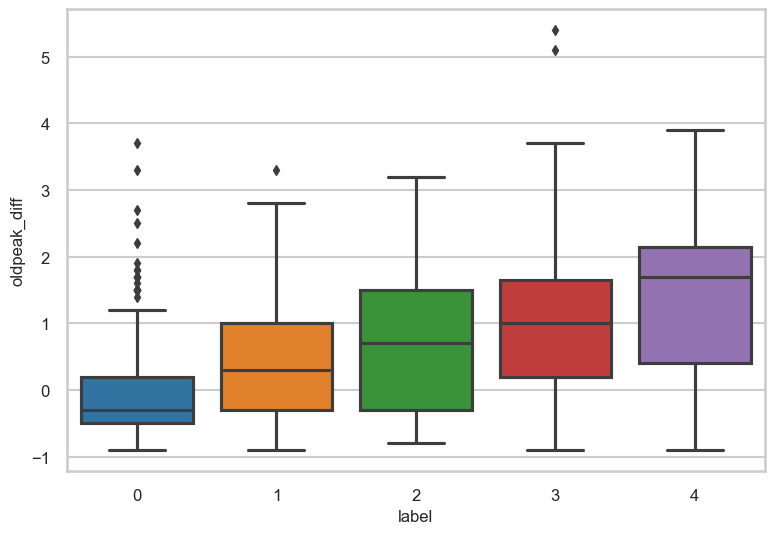

In [162]:
plt.figure(figsize=(9,6))

sns.boxplot(data=data, x='label', y='oldpeak_diff')

In [163]:
# Un valor de oldpeak_diff por encima de 0.5  nos indica gran riesgo de estar enfermo
data[data['oldpeak_diff'] > 0.5]['label'].value_counts()

1    70
3    70
0    67
2    63
4    21
Name: label, dtype: int64

In [164]:
# por encima de 1, el riesgo es mucho mayor
data[data['oldpeak_diff'] >= 0.75]['label'].value_counts()

3    59
2    56
1    52
0    52
4    21
Name: label, dtype: int64

In [165]:
# en combinación con slope 2-2, también es un buen indicador de riesgo
data[(data['oldpeak_diff'] > 0.1) & (data['slope'].isin([2, 3]))]['label'].value_counts()

1    72
3    71
2    65
0    61
4    25
Name: label, dtype: int64

In [166]:
# en muchos casos, un valor grande de oldpeak_diff va asociado a pendiente 2-3 (más riesgo de enfermedad)
data[data['oldpeak_diff'] >= 0.5]['slope'].value_counts()

2    214
1     61
3     51
Name: slope, dtype: Int64

<Figure size 900x600 with 0 Axes>

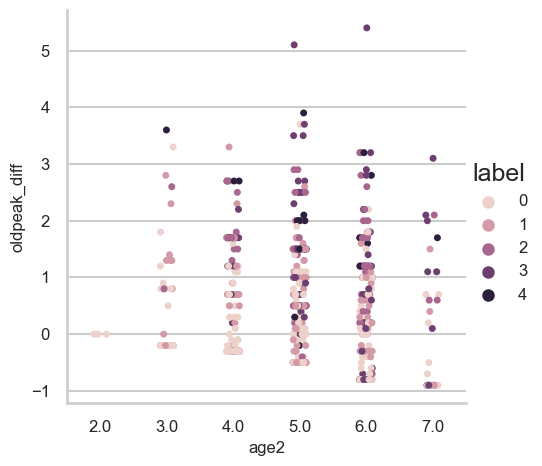

In [167]:
plt.figure(figsize=(9,6))

sns.catplot(data=data, x='age2', y='oldpeak_diff', hue='label')

<Axes: xlabel='oldpeak_diff', ylabel='thalach_diff'>

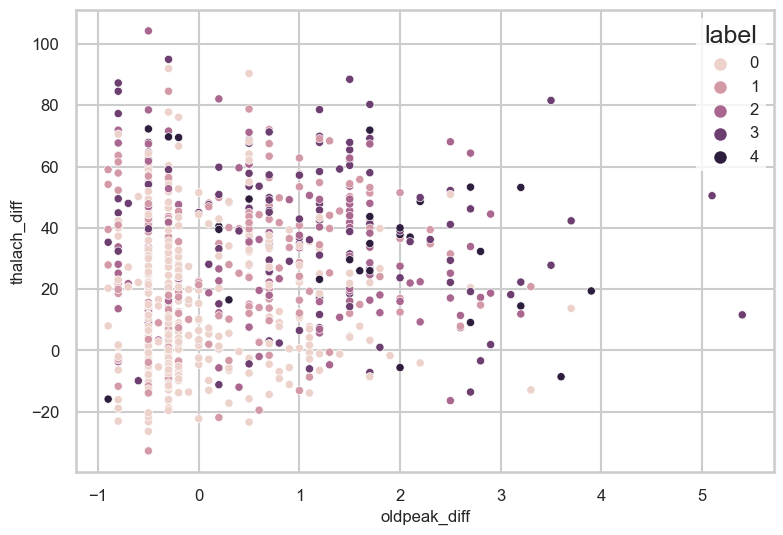

In [189]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=data, y='thalach_diff', x='oldpeak_diff', hue='label', s=35)

In [186]:
data['oldpeak2'] = 0
data.loc[np.abs(data['oldpeak']) >= 1, 'oldpeak2'] = 1
# data.loc[np.abs(data['oldpeak']) >= 2, 'oldpeak2'] = 2


data['oldpeak2'].value_counts()

0    510
1    355
Name: oldpeak2, dtype: int64

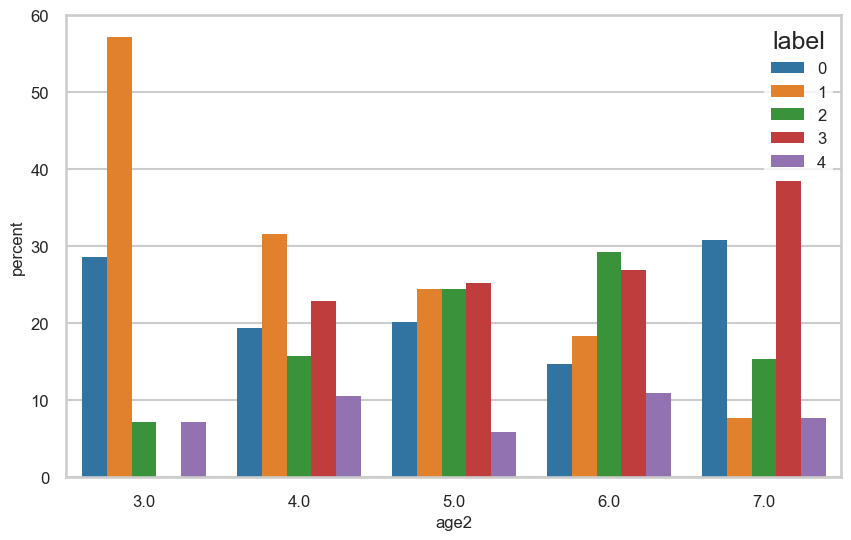

In [188]:
plt.figure(figsize=(10,6))

(data[(data['oldpeak2'] != 0) & (data['slope'].isin([2,3]))].groupby('age2')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='label'))

plt.show()

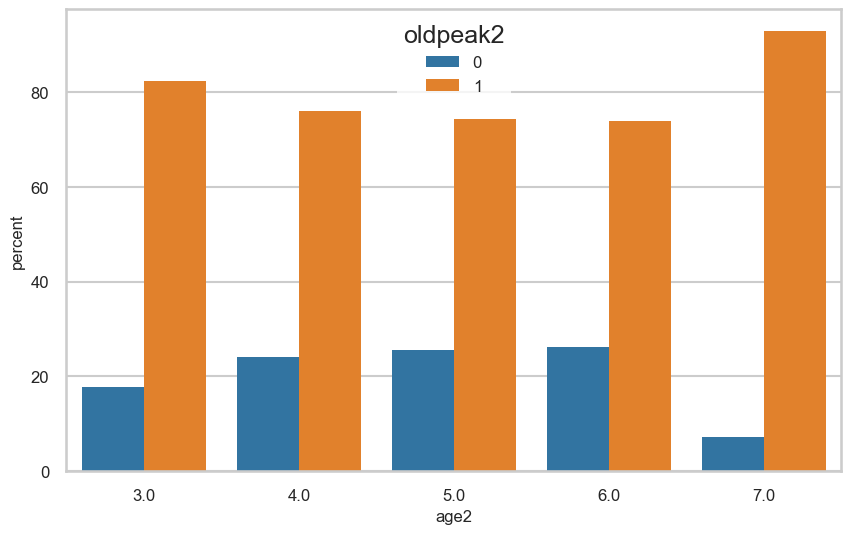

In [187]:
plt.figure(figsize=(10,6))

(data[(data['slope'] == 3) | (data['slope'] == 2)].groupby('age2')['oldpeak2']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='oldpeak2'))
plt.show()

Valores de pendiente plana y descendente van típicamente ligados a valores altos de `oldpeak`

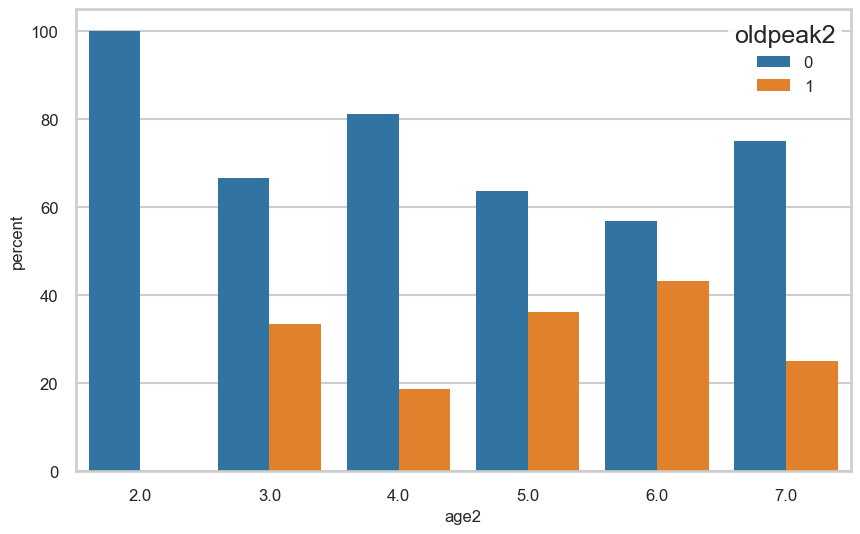

In [74]:
plt.figure(figsize=(10,6))

(data[(data['slope'] == 1)].groupby('age2')['oldpeak2']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='oldpeak2'))
plt.show()

Para valores de pendiente ascendente, oldpeak suele tomar valores más bajos que para pendientes planas o descendentes

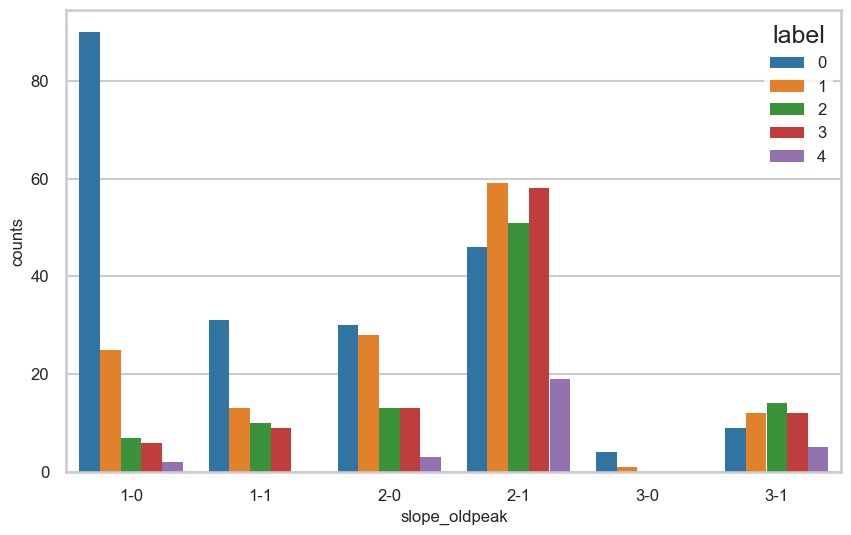

In [75]:
grouped_data = data.groupby(['slope', 'oldpeak2'])['label'].value_counts()

df = grouped_data.reset_index(name='counts')
df.columns = ['slope', 'oldpeak2', 'label', 'counts']
df['slope_oldpeak'] = df['slope'].astype(str) + "-" + df['oldpeak2'].astype(str)

plt.figure(figsize=(10,6))

sns.barplot(data=df, x='slope_oldpeak', y='counts',hue='label')
plt.show()

- El valor de `oldpeak` no nos dice nada, a menos que también se informe `slope`

- Valores de pendiente plana y descendente (2,3) en combinación con un valor de `oldpeak` mayor que uno están más comunmente asociados con enfermedades cardíacas en comparación con una pendiente ascendente y/o valores de `slope` pequeños.


**Thalach**

In [170]:
data.groupby(['age2'])['thalach'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,160.0,179.250000,202.0
1,3.0,72,98.0,156.718310,192.0
2,4.0,202,80.0,146.277778,194.0
3,5.0,352,60.0,134.662651,195.0
4,6.0,205,63.0,127.765363,179.0
5,7.0,30,92.0,121.769231,162.0


In [171]:
# El valor desciende con la edad, algo normal, si recordamos la fórmula que nos da un valor aprox (220 - edad)
# Hay algunos valores muy bajos para gente que se supone que está sana, podrían ser medidas incorrectas
data[data['label'] == 0].groupby(['age2'])['thalach'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,160.0,179.250000,202.0
1,3.0,49,98.0,161.291667,192.0
2,4.0,123,80.0,153.675000,194.0
3,5.0,158,69.0,144.703947,190.0
4,6.0,56,86.0,138.297872,179.0
5,7.0,9,112.0,127.875000,162.0


In [172]:
# Los enfermos tienen en media menor valor de thalach que los no enfermos, para todos los rangos de edad
data[data['label'] != 0].groupby(['age2'])['thalach'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,3.0,23,105.0,147.173913,182.0
1,4.0,79,96.0,134.897436,181.0
2,5.0,194,60.0,126.183333,195.0
3,6.0,149,63.0,124.015152,174.0
4,7.0,21,92.0,119.055556,162.0


In [64]:
data[(data['label'] == 0) & (data['thalach'] < 120)].groupby(['age2'])['thalach'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,3.0,2,98.0,102.000000,106.0
1,4.0,9,80.0,107.555556,118.0
2,5.0,22,69.0,104.500000,118.0
3,6.0,10,86.0,105.000000,118.0
4,7.0,3,112.0,114.000000,116.0


In [175]:
data[(data['thalach'] < 70)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,na_count,num_na_count,cat_na_count,age2,trestbps2,oldpeak_abs,oldpeak_diff
159,65.0,1,4,145.0,NaN,<NA>,1,67.0,0,NaN,<NA>,<NA>,6,3,5,2,3,6.0,1.0,NaN,NaN
402,51.0,1,4,140.0,NaN,0,0,60.0,0,0.0,2,<NA>,3,2,2,1,1,5.0,1.0,0.0,-0.5
403,58.0,1,4,132.0,458.0,1,0,69.0,0,1.0,3,<NA>,<NA>,0,2,0,2,5.0,1.0,1.0,0.5
857,60.0,1,4,135.0,NaN,0,0,63.0,1,0.5,1,<NA>,7,3,2,1,1,6.0,1.0,0.5,-0.3


In [66]:
data[(data['thalach'] < 120)]['label'].value_counts()

3    54
0    46
1    46
2    37
4    12
Name: label, dtype: int64

In [177]:
data['thalach_max'] =  (200 - 0.7 * data['age'])

data['thalach_diff'] = data['thalach_max'] - data['thalach']

data['thalach_diff'].describe()

count    810.000000
mean      25.165432
std       24.479356
min      -32.800000
25%        5.700000
50%       23.300000
75%       42.750000
max      104.300000
Name: thalach_diff, dtype: float64

<Axes: xlabel='age2', ylabel='thalach_diff'>

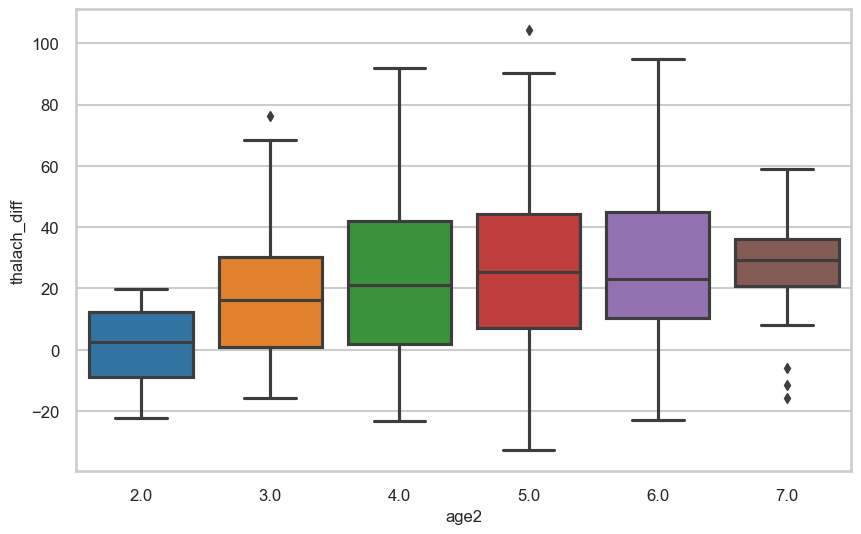

In [178]:
plt.figure(figsize=(10,6))

sns.boxplot(data=data, x='age2', y='thalach_diff')

<Axes: xlabel='label', ylabel='thalach_diff'>

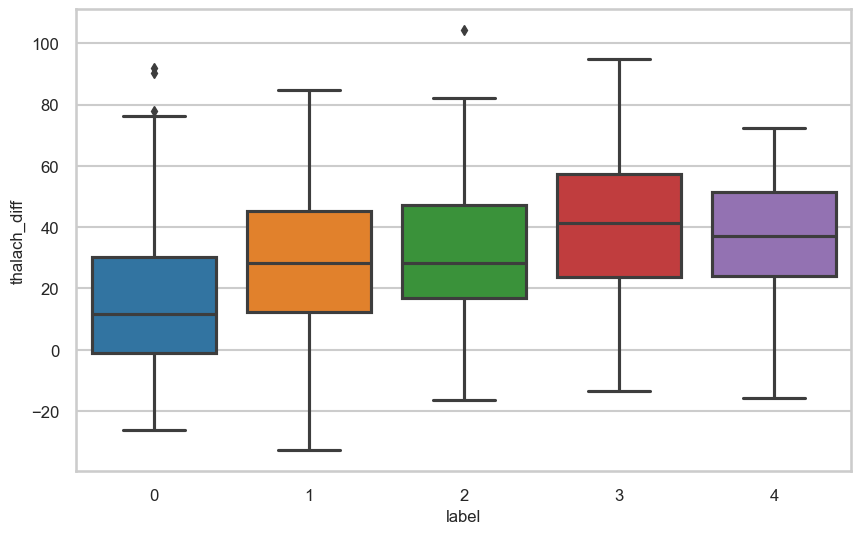

In [179]:
plt.figure(figsize=(10,6))

sns.boxplot(data=data, x='label', y='thalach_diff')

In [180]:
data[(data['thalach_diff'] > 30) ]['age2'].value_counts()

5.0    152
6.0     75
4.0     73
3.0     18
7.0     13
Name: age2, dtype: int64

In [181]:
data[(data['thalach_diff'] >= 33) ]['label'].value_counts()

1    83
0    82
3    71
2    56
4    18
Name: label, dtype: int64

In [182]:
data[(data['thalach'] < 130) ]['label'].value_counts()

1    78
0    76
3    74
2    58
4    19
Name: label, dtype: int64

In [481]:
data[(data['thalach_diff'] <= 30)]['label'].value_counts()

0    284
1     88
2     59
3     36
4     12
Name: label, dtype: int64

In [76]:
data[categorical_vars] = data[categorical_vars].replace(np.nan, 99)
data[categorical_vars] = data[categorical_vars].astype(int)
data['ca'] = data['ca'].replace(9, 3)

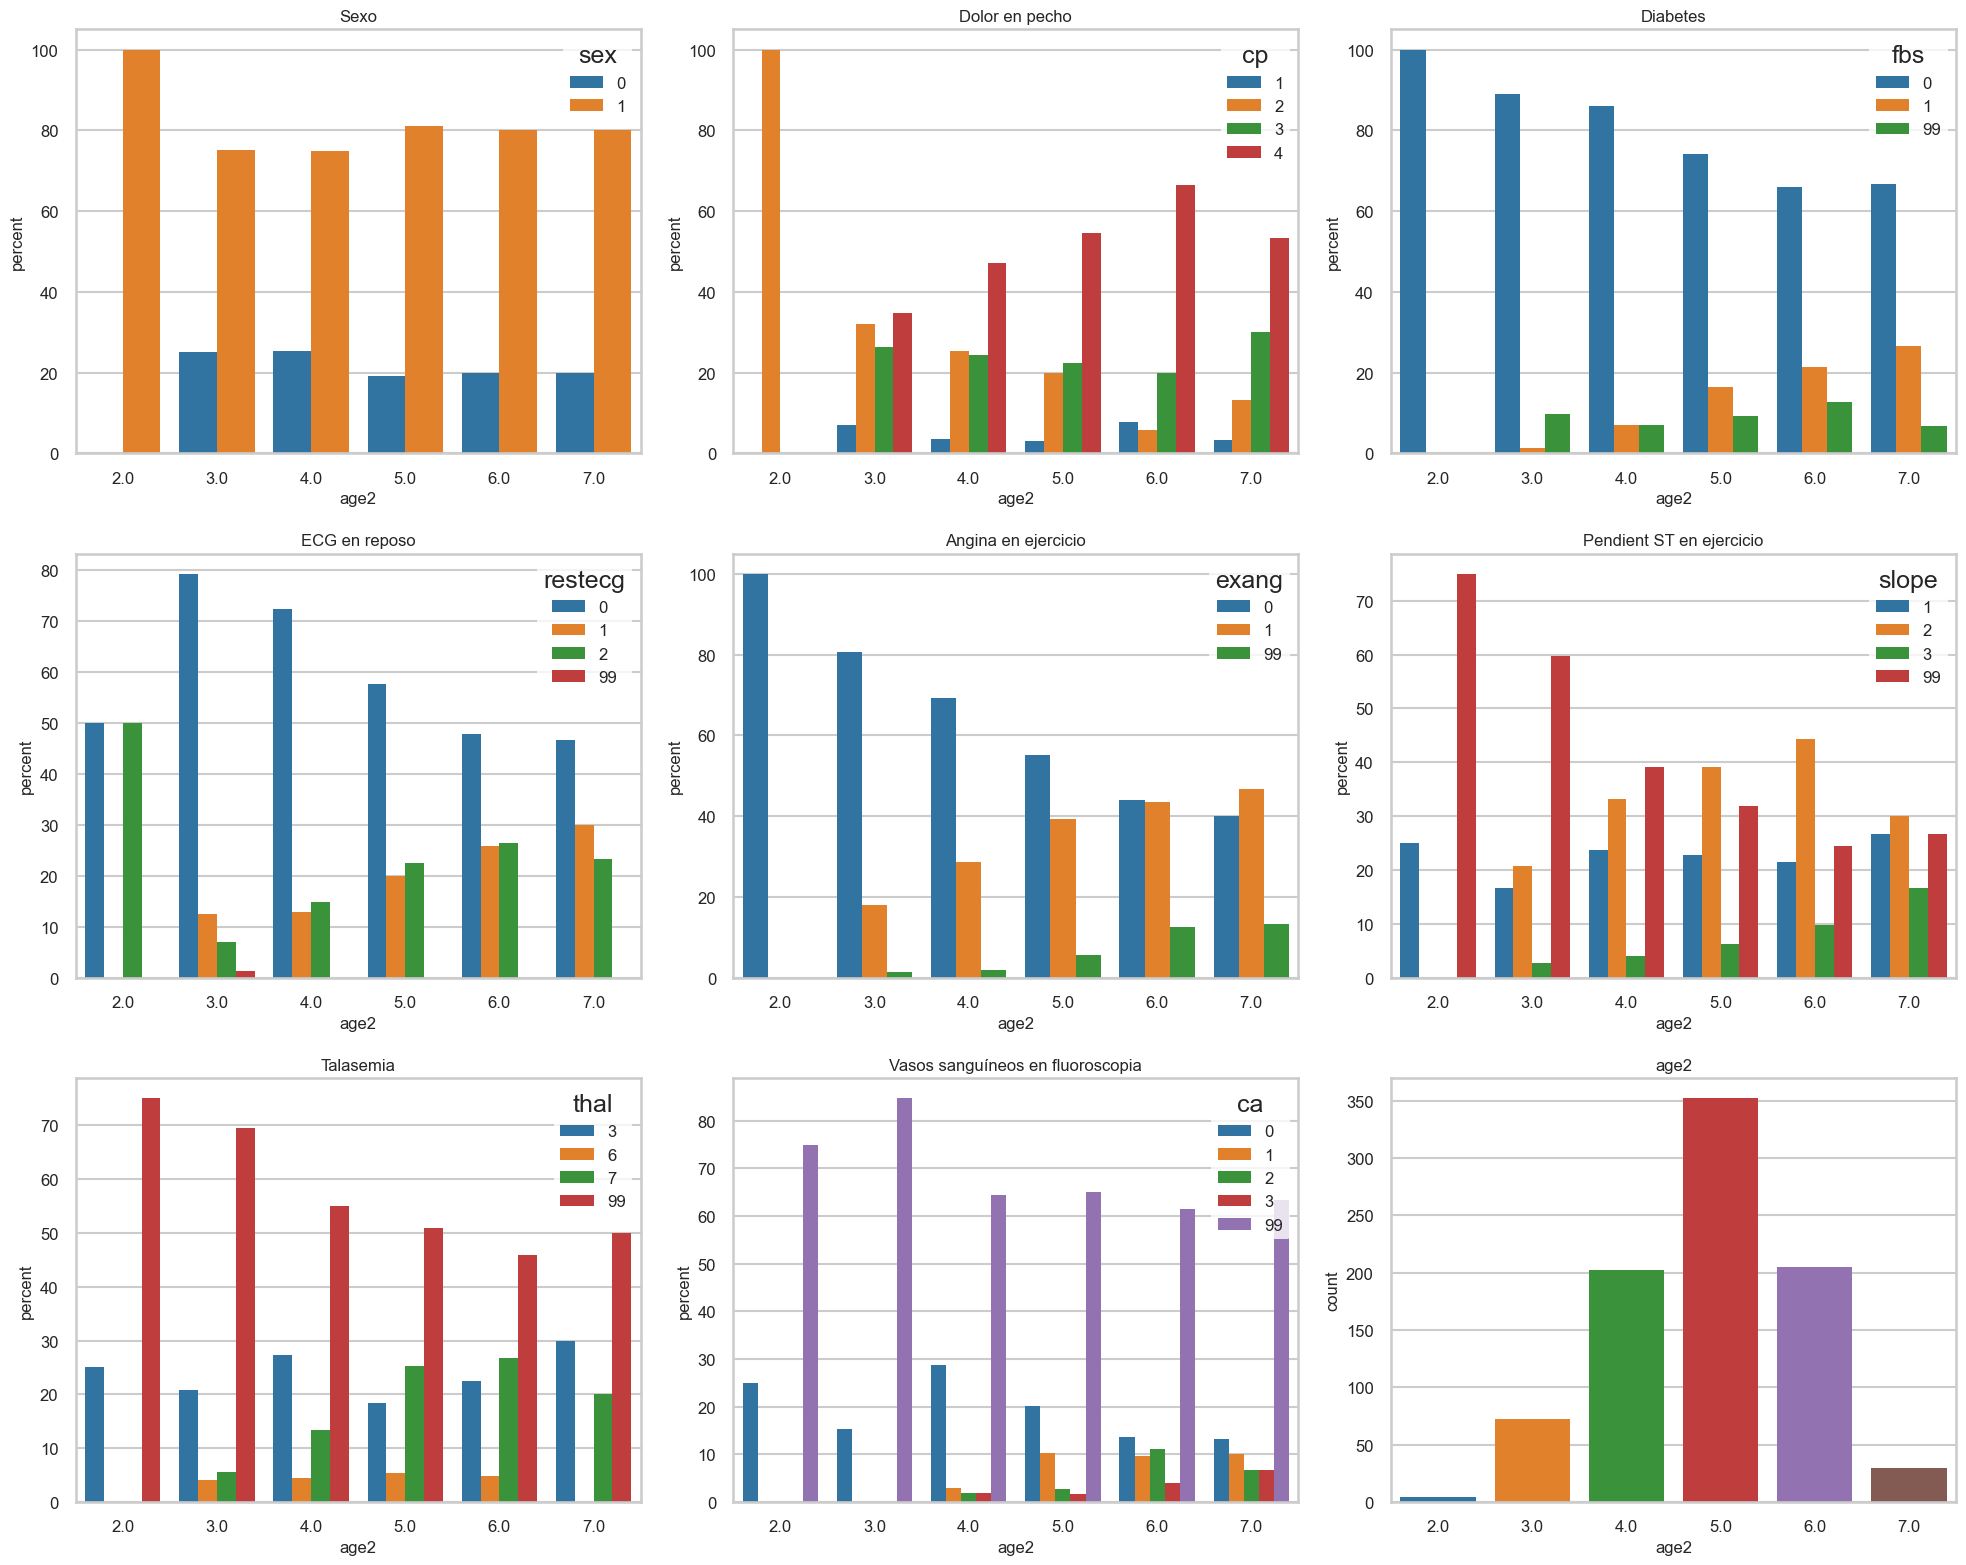

<Figure size 1400x1000 with 0 Axes>

In [483]:
fig, axes = plt.subplots(3, 3, figsize=(20,16))


(data.groupby('age2')['sex']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='sex',ax=axes[0,0]))
axes[0,0].set_title('Sexo')

(data.groupby('age2')['cp']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='cp',ax=axes[0,1]))
axes[0,1].set_title('Dolor en pecho')

(data.groupby('age2')['fbs']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='fbs',ax=axes[0,2]))
axes[0,2].set_title('Diabetes')

(data.groupby('age2')['restecg']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='restecg',ax=axes[1,0]))
axes[1,0].set_title('ECG en reposo')

(data.groupby('age2')['exang']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='exang',ax=axes[1,1]))
axes[1,1].set_title('Angina en ejercicio')

(data.groupby('age2')['slope']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='slope',ax=axes[1,2]))
axes[1,2].set_title('Pendient ST en ejercicio')

(data.groupby('age2')['thal']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='thal',ax=axes[2,0]))
axes[2,0].set_title('Talasemia')

(data.groupby('age2')['ca']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='age2',y='percent',hue='ca',ax=axes[2,1]))
axes[2,1].set_title('Vasos sanguíneos en fluoroscopia')

sns.countplot(x='age2', data=data, ax=axes[2,2])
axes[2,2].set_title('age2')

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

**Dolor en pecho (cp)**

- La angina típica (1) es la que menor % de incidencia tiene, normalmente se debe a esfuerzo físico o estrés emocional.
- La angina atípica (2) es el caso más frecuente en pacientes sanos. 
- El % de dolor no anginoso (3) no tiene mucha variación con la edad
- Para mayor edad, aumenta el % de asintomáticos (4), lo que se explica porque esta patología puede ser más común en ciertos grupos de población, como mujeres, personas mayores o diabéticos.
- El % de angina atípica (2) desciende a partir de los 60 años. 


**Diabetes (fbs)**

- El número de casos aumenta con la edad, algo normal
- No parece tener mucha correlación con la enfermedad cardíaca

**ECG (restecg)**

- Aumentan los diágnosticos de 1 o 2 con la edad
- Para el rango de 20-30 años tenemos 50% de casos de tipo 2, lo que parece un outlier

**Dolor de pecho en ejercicio (exang)**

- Aumenta el número de casos con la edad, y también aumenta el número de valores no informados

**Pendiente ST (slope)**

- El % de casos que están más relacionados con la enfermedad (2 y 3)  aumentan con la edad

**Thalium test (thal)** 

- El % de casos totales que están más ligados a efermedad cardíaca (6 y 7) aumentan con la edad

**Fluorosopia (ca)**

- El % de casos totales que están más ligados a efermedad cardíaca (1, 2 y 3) aumentan con la edad
- El % de pacientes con resultado negativo (0) sobre el total de los pacientes a los que se les practica la prueba, disminuye con la edad




In [484]:
# Entre los diabéticos, es más común la angina de tipo 4
data[data['fbs'] == 1]['cp'].value_counts()

4    72
3    30
2    15
1     8
Name: cp, dtype: int64

In [485]:
# diabéticos con cp 4 tienen más riesgo de enfermedad cardíaca
data[(data['fbs'] == 1) & (data['cp'] == 4)]['label'].value_counts()

3    22
2    20
1    19
0     8
4     3
Name: label, dtype: int64

<AxesSubplot: xlabel='cp', ylabel='percent'>

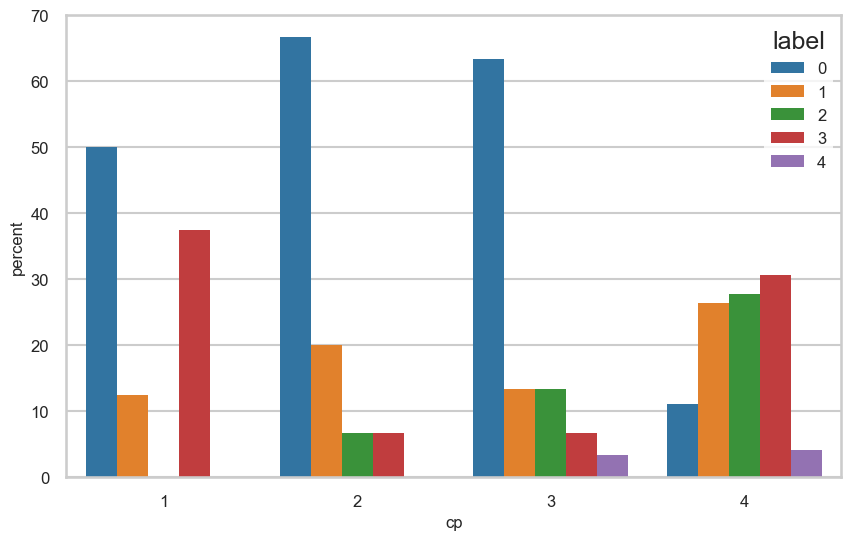

In [486]:
plt.figure(figsize=(10,6))

(data[(data['fbs'] == 1)].groupby('cp')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='cp',y='percent',hue='label'))

<AxesSubplot: xlabel='cp', ylabel='percent'>

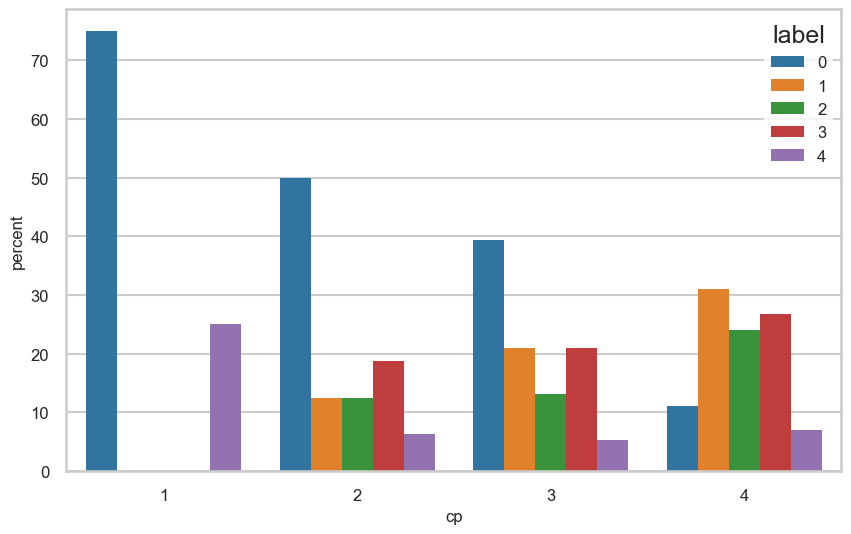

In [487]:
plt.figure(figsize=(10,6))

(data[(data['exang'] == 1)].groupby('cp')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='cp',y='percent',hue='label'))

<AxesSubplot: xlabel='oldpeak2', ylabel='percent'>

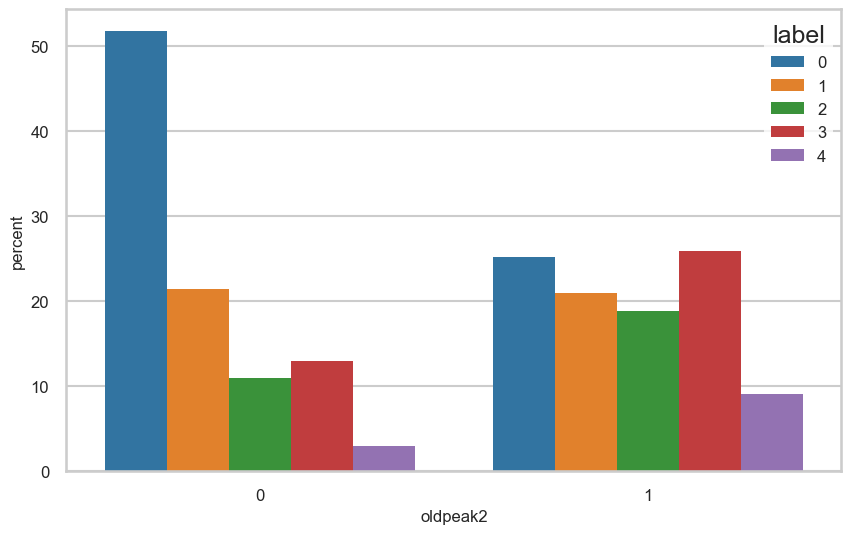

In [488]:
plt.figure(figsize=(10,6))

(data[(data['restecg'] == 1) | (data['restecg'] == 2)].groupby('oldpeak2')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='oldpeak2',y='percent',hue='label'))

<AxesSubplot: xlabel='cp', ylabel='percent'>

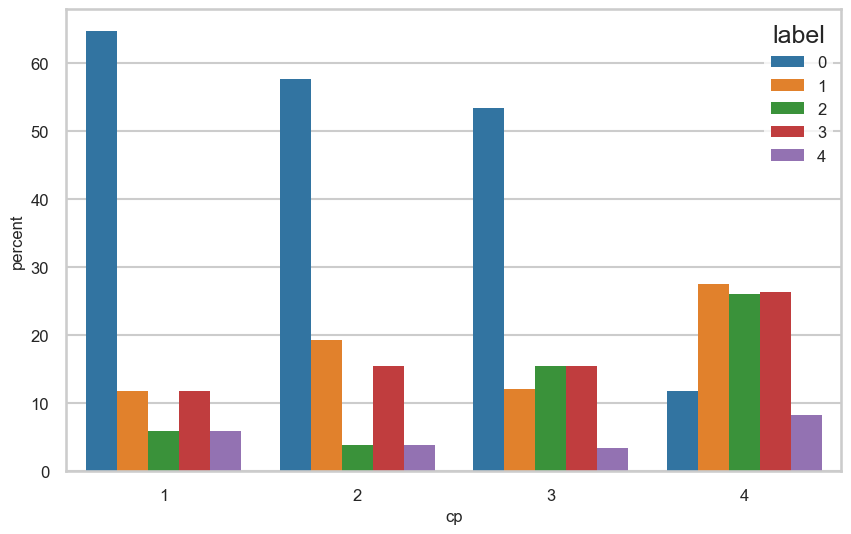

In [489]:
plt.figure(figsize=(10,6))

(data[(data['oldpeak2'] == 1)].groupby('cp')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='cp',y='percent',hue='label'))

<AxesSubplot: xlabel='cp', ylabel='percent'>

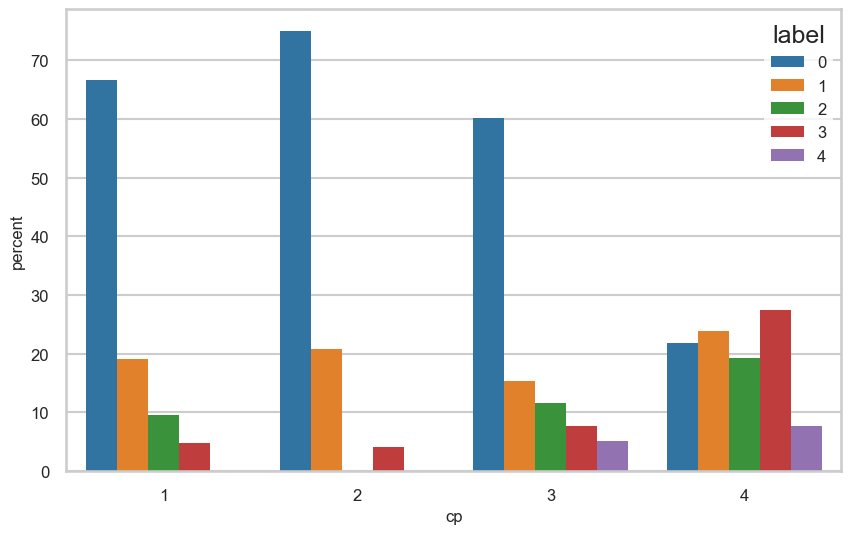

In [490]:
plt.figure(figsize=(10,6))

(data[(data['restecg'] == 1) | (data['restecg'] == 2)].groupby('cp')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='cp',y='percent',hue='label'))

**Conclusiones - factores de riesgo**

- Edad por encima de 60 años (alto) o por encima de 50 (moderado)
- Nivel de colesterol en sangre por encima de 200 (moderado) o 300 (alto)
- Presión arterial por encima de 180 (alto), o mayor que 120 (moderado)
- Pendiente ST plana (2) o descendente (3) en combinación con oldpeak ST mayor que uno (alto) o por debajo de 1 (moderado)
- Frecuencia cardíaca máxima alcanzada por debajo de 130, o más de 30 ppm por debajo de la frecuencia máxima teórica (200 - 0.7 * edad)
- Valores de 6 (medio) o 7 (alto) en el test de thalium
- Valores de 1, 2, 3 en la fluoroscopia
- Angina en ejercicio, si tiene angina de tipo 4 (alto) o tipo 2-3 (medio). 
- Diabéticos (fbs 1) con dolor de angina tipo 4 (medio)


In [191]:
# vamos a crear una columna para cuantificar puntos de riesgo de enfermedad
data['risks'] = 0

data.loc[data['age2'] == 5, 'risks'] += 1
data.loc[data['age2'] == 6, 'risks'] += 1

data.loc[data['chol'] >= 200, 'risks'] += 1
data.loc[data['chol'] >= 300, 'risks'] += 1

data.loc[data['trestbps'] >= 120, 'risks'] += 1
data.loc[data['trestbps'] >= 170, 'risks'] += 1

#data.loc[data['thalach'] <= 130, 'risks'] += 1
data.loc[(data['thalach_diff'] >= 33) | (data['thalach'] <= 120), 'risks'] += 1


# cp 4 en combinación con otro factor de riesgo
data.loc[(data['cp'].isin([1, 4])) & ((data['fbs'] == 1) | (data['exang'] == 1) | (data['oldpeak2'] == 1) | (data['restecg'] != 0)) , 'risks'] += 1

# depresión ST por encima de la media, con pendiente plana o descendente
data.loc[((data['oldpeak_diff'] > 0.1) | (data['oldpeak'] >= 1)) & (data['slope'].isin([2, 3])), 'risks'] += 2

# depresión ST muy alta
#data.loc[data['oldpeak_diff'] >= 0.5, 'risks'] += 1

# vasos principales obstruidos
data.loc[data['ca'] == 1, 'risks'] += 2
data.loc[data['ca'] >= 2, 'risks'] += 1

# defecto de circulación de la sangre en el corazón
data.loc[data['thal'].isin([6,7]), 'risks'] += 2

<Axes: >

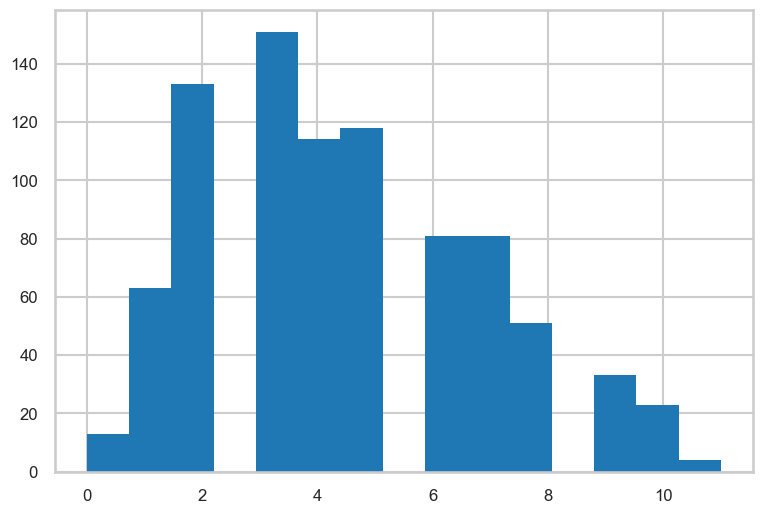

In [192]:
plt.figure(figsize=(9,6))
data['risks'].hist(bins=15)

In [494]:
data['risks'].describe()

count    865.000000
mean       4.744509
std        1.997839
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: risks, dtype: float64

<AxesSubplot: xlabel='age', ylabel='risks'>

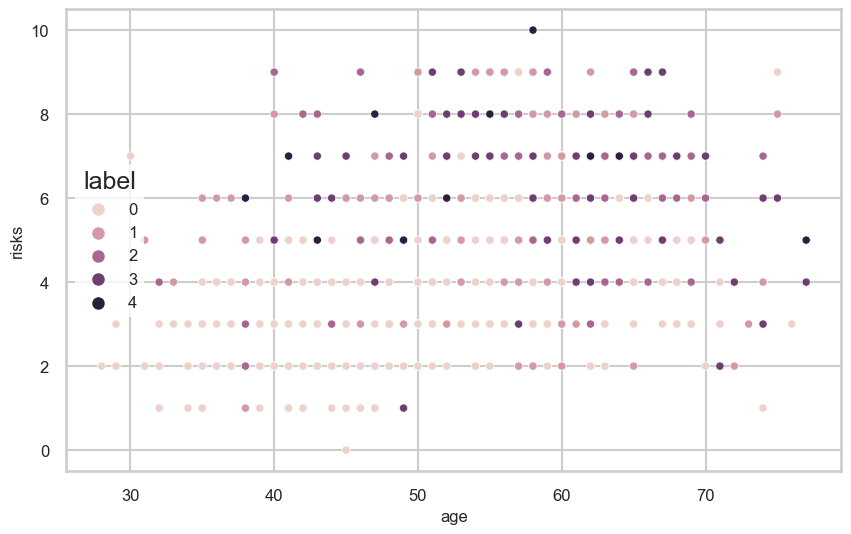

In [495]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='age', y='risks', hue='label', s=35)

In [496]:
data['label'] = data['label'].astype(int)

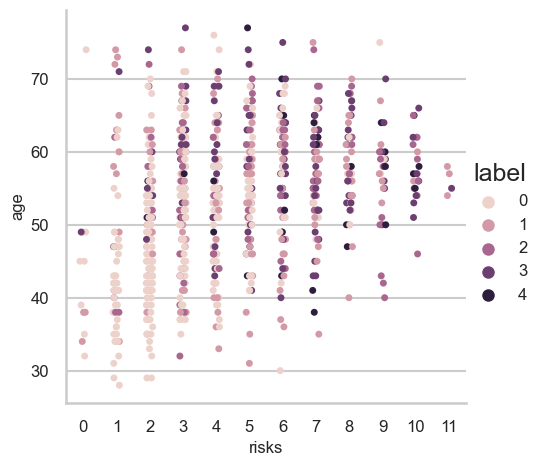

In [193]:
sns.catplot(data=data,x='risks',y='age',hue='label')

In [80]:
data.groupby(['age2'])['risks'].agg([len, np.min, np.mean, np.max]).reset_index()

,age2,len,amin,mean,amax
0,2.0,4,2,2.250000,3
1,3.0,72,1,3.069444,7
2,4.0,202,0,3.628713,9
3,5.0,352,2,5.346591,10
4,6.0,205,2,5.478049,9
5,7.0,30,1,4.533333,9


In [81]:
data[(data['age2'] >= 6) & (data['label'] != 0) & (data['risks'] > 2)]['null_count'].value_counts()

2    53
0    50
4    22
3    21
7    14
1     2
8     1
5     1
Name: null_count, dtype: int64

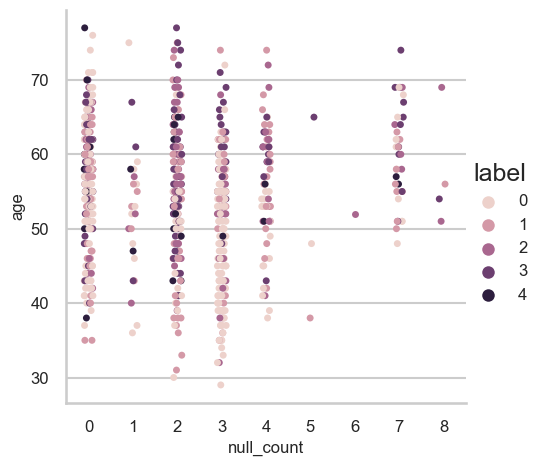

In [82]:
sns.catplot(data=data[data['risks'] > 2],x='null_count',y='age',hue='label')

<Axes: xlabel='label', ylabel='percent'>

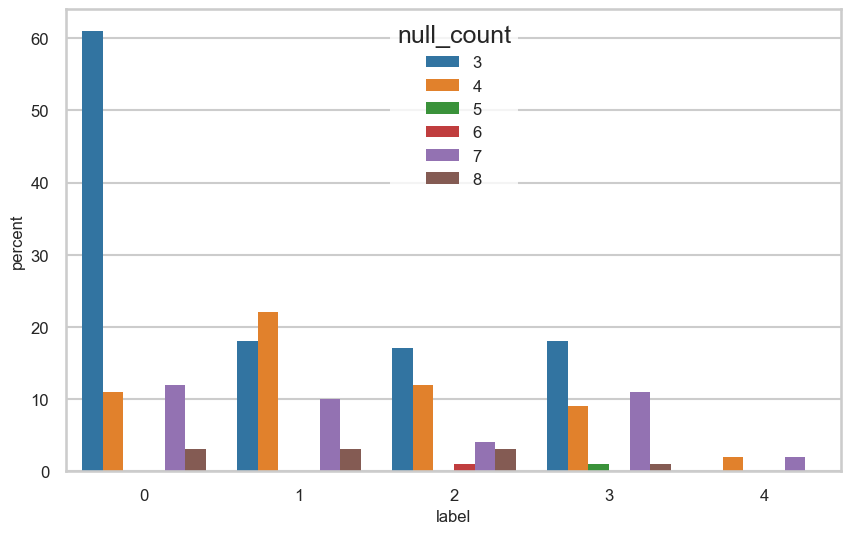

In [85]:
plt.figure(figsize=(10,6))

(data[ (data['age'] >= 50) & (data['risks'] >= 2) & (data['null_count'] >= 3)].groupby('label')['null_count']
.value_counts(normalize=False)
#.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='label',y='percent',hue='null_count'))

<Axes: xlabel='risks', ylabel='percent'>

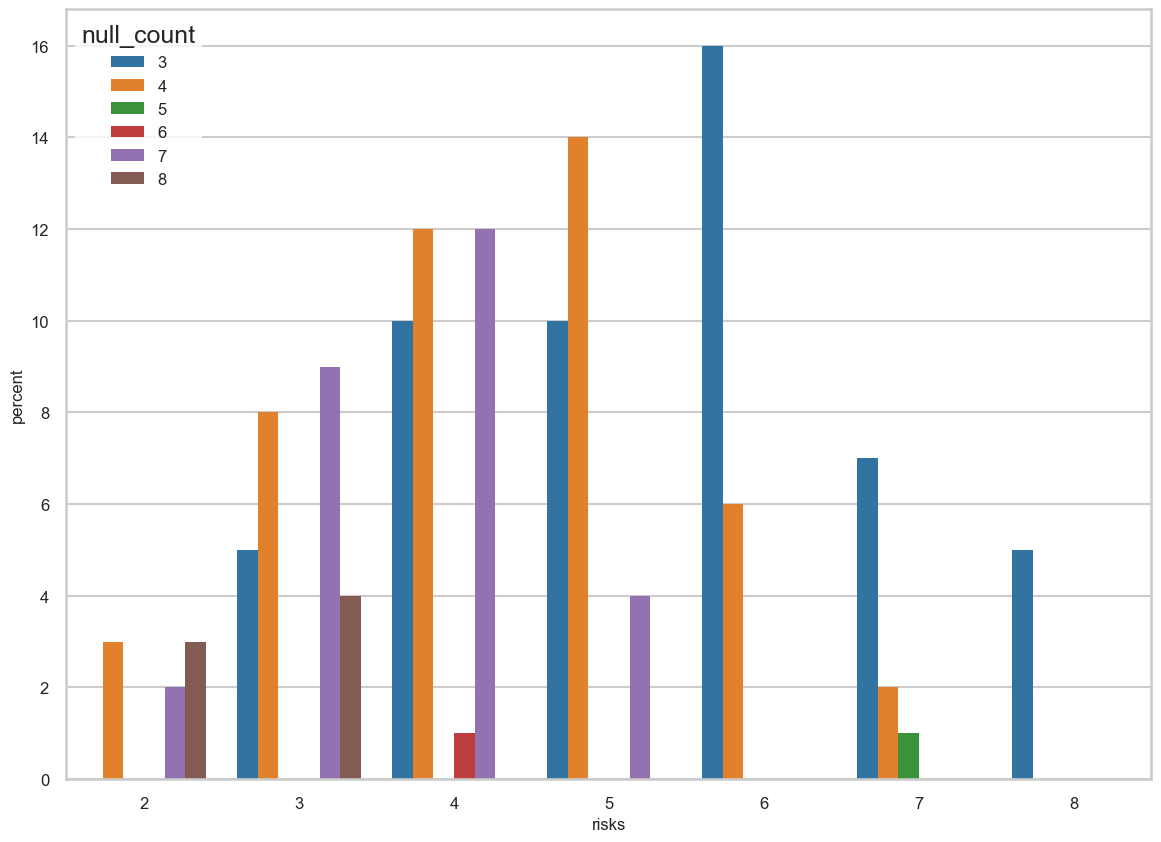

In [86]:
(data[ (data['age'] >= 50) & (data['label'] !=0 ) & (data['null_count'] >= 3)].groupby('risks')['null_count']
.value_counts(normalize=False)
#.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='risks',y='percent',hue='null_count'))

<Axes: xlabel='ca', ylabel='percent'>

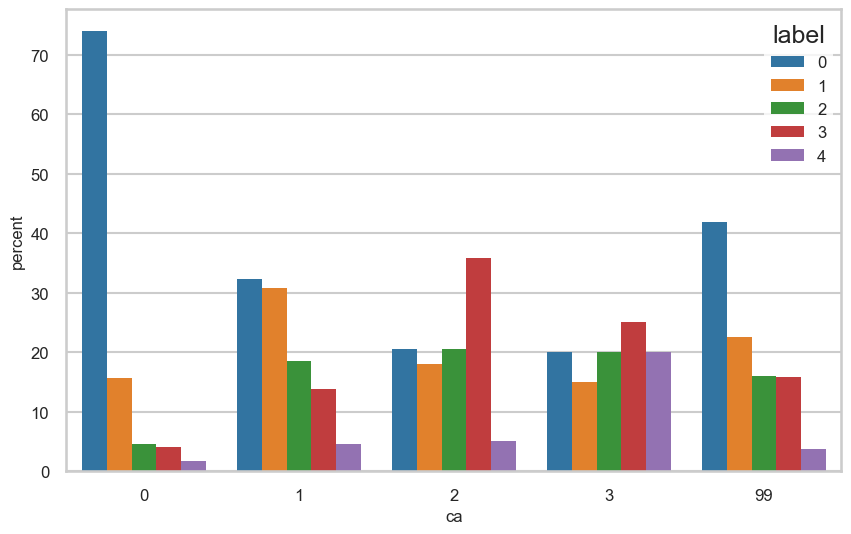

In [89]:


plt.figure(figsize=(10,6))

(data[(data['ca'].notna()) ].groupby('ca')['label']
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.barplot,'data'), x='ca',y='percent',hue='label'))